In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
# Load Saved Model

model = tf.keras.models.load_model("trained_model.keras")

In [6]:
# Get Predictions

test_dataset = tf.keras.utils.image_dataset_from_directory(
     'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
# Get true labels first
y_true = np.concatenate([labels.numpy() for images, labels in test_dataset])

# Predict
predictions = model.predict(test_dataset, verbose=1)

y_pred = np.argmax(predictions, axis=1)

# If labels are one-hot
y_true = np.argmax(y_true, axis=1)


550/550 [==============================] - 184s 335ms/step


In [10]:
# Create Confusion Matrix

cm = confusion_matrix(y_true, y_pred)

# Normalize row-wise
cm_normalized = cm.astype(float) / cm.sum(axis=1, keepdims=True)

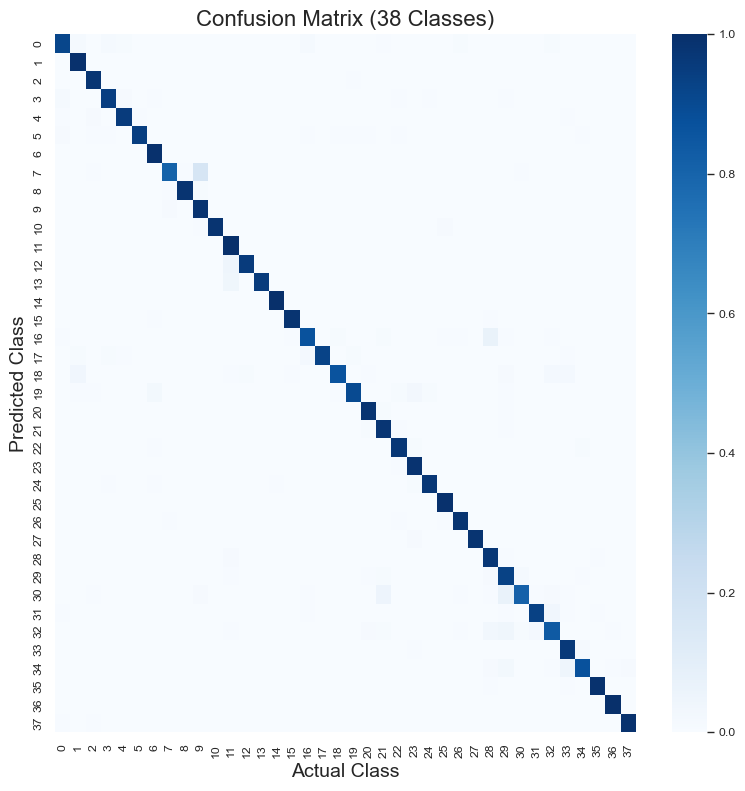

In [26]:
plt.figure(figsize=(8, 8))
sns.set_style("white")
sns.set_context("paper")

sns.heatmap(
    cm_normalized,
    cmap="Blues",
    annot=False,  
    cbar=True
)

plt.xlabel("Actual Class", fontsize=14)
plt.ylabel("Predicted Class", fontsize=14)
plt.title("Confusion Matrix (38 Classes)", fontsize=16)

plt.tight_layout()
plt.savefig("confusion_matrix_clean.png", dpi=300)
plt.show()

In [14]:
# Print Overall Accuracy

accuracy = np.trace(cm) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.9500


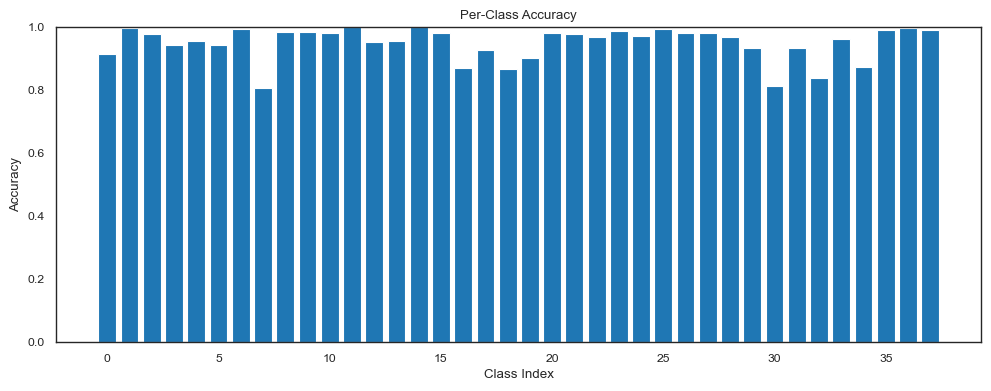

In [24]:
# per-call accuracy 

class_accuracy = np.diag(cm_normalized)

plt.figure(figsize=(10,4))
plt.bar(range(len(class_accuracy)), class_accuracy)
plt.xlabel("Class Index")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

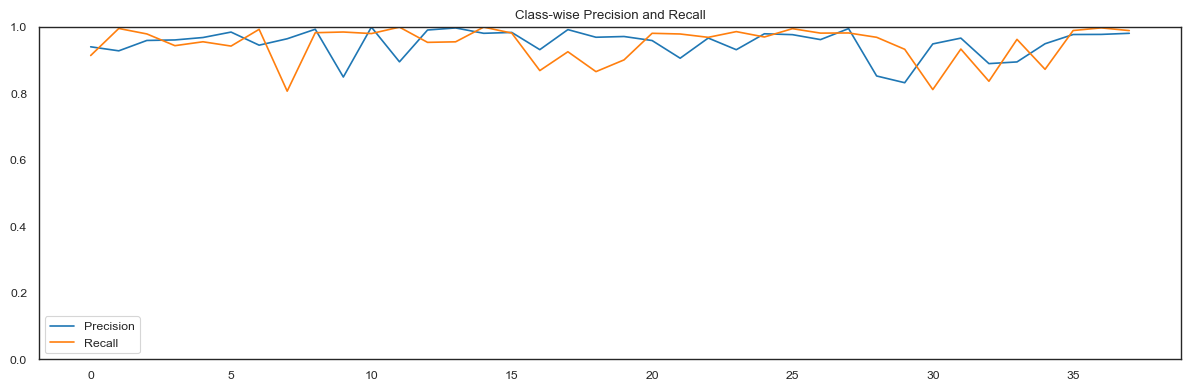

In [35]:
# class wise precision and recall

from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True)

precision = [report[str(i)]['precision'] for i in range(38)]
recall = [report[str(i)]['recall'] for i in range(38)]

plt.figure(figsize=(12,4))
plt.plot(precision, label="Precision")
plt.plot(recall, label="Recall")
plt.legend()
plt.title("Class-wise Precision and Recall")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [43]:
cm_copy = cm.copy()
np.fill_diagonal(cm_copy, 0)

top_indices = np.unravel_index(np.argsort(cm_copy.ravel())[-10:], cm_copy.shape)

for i, j in zip(top_indices[0], top_indices[1]):
    print(f"Class {i} → misclassified as Class {j} : {cm_copy[i,j]}")


Class 13 → misclassified as Class 11 : 17
Class 18 → misclassified as Class 1 : 17
Class 31 → misclassified as Class 32 : 17
Class 32 → misclassified as Class 29 : 18
Class 12 → misclassified as Class 11 : 22
Class 34 → misclassified as Class 33 : 22
Class 30 → misclassified as Class 21 : 25
Class 30 → misclassified as Class 29 : 33
Class 16 → misclassified as Class 28 : 34
Class 7 → misclassified as Class 9 : 69


In [55]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

550/550 [==============================] - 201s 366ms/step


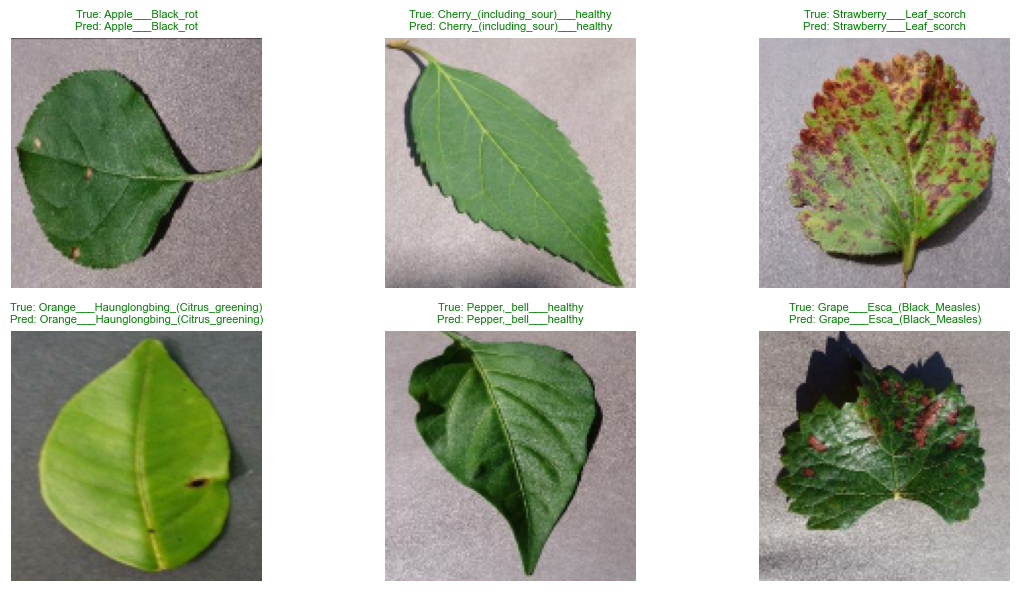

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 🔹 Step 1: Predict entire test dataset
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=1)

# 🔹 Step 2: Collect images and true labels in SAME order
images_list = []
y_true = []

for images, labels in test_dataset:
    images_list.extend(images.numpy())
    y_true.extend(np.argmax(labels.numpy(), axis=1))

images_list = np.array(images_list)
y_true = np.array(y_true)

# 🔹 Step 3: Get class names automatically
class_name = test_dataset.class_names

# 🔹 Step 4: Visualize random samples (perfectly synced)

plt.figure(figsize=(12,6))

for i in range(6):
    idx = random.randint(0, len(y_true)-1)

    img = images_list[idx]
    true_class = y_true[idx]
    pred_class = y_pred[idx]

    true_name = class_name[true_class]
    pred_name = class_name[pred_class]

    color = "green" if true_class == pred_class else "red"

    plt.subplot(2,3,i+1)
    plt.imshow(img.astype("uint8"))
    plt.title(
        f"True: {true_name}\nPred: {pred_name}",
        color=color,
        fontsize=8
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


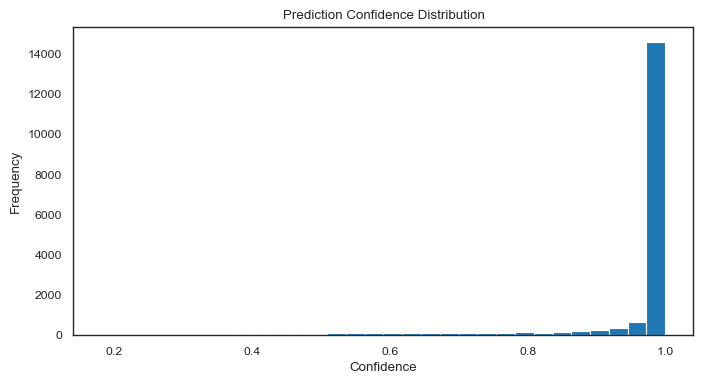

In [47]:
confidence_scores = np.max(predictions, axis=1)

plt.figure(figsize=(8,4))
plt.hist(confidence_scores, bins=30)
plt.title("Prediction Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()


In [49]:
feature_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.layers[-2].output
)

features = feature_model.predict(test_dataset)


550/550 [==============================] - 196s 357ms/step


In [65]:
print(features.shape)

(17572, 1500)


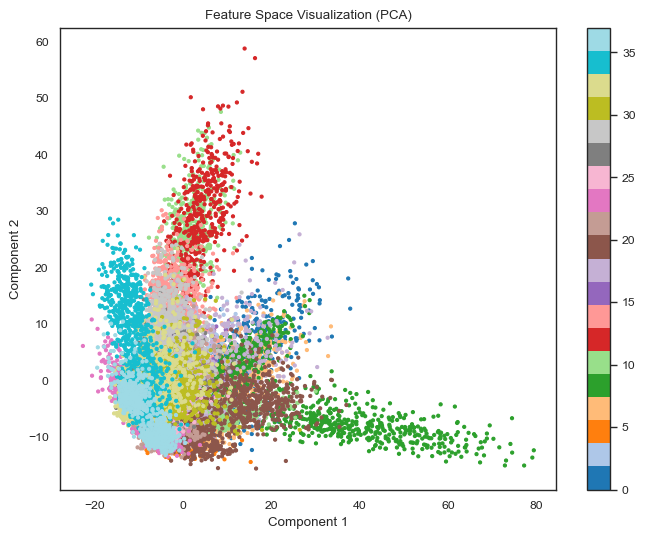

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_true, cmap='tab20', s=5)
plt.title("Feature Space Visualization (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()
